In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import glob
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [38]:
# Load the dataset
files_for_normal = glob.glob('/content/drive/MyDrive/Dataset/Normal/*.*', recursive=True)
files_for_covid = glob.glob('/content/drive/MyDrive/Dataset/Covid-19/*.*', recursive=True)

x = []
y = []

In [39]:
for file in files_for_normal:
    img = cv2.imread(file, 1)
    img = cv2.resize(img, (224, 224))
    x.append(img)
    y.append(0)

for file in files_for_covid:
    img = cv2.imread(file, 1)
    img = cv2.resize(img, (224, 224))
    x.append(img)
    y.append(1)

x = np.array(x) / 255
y = np.array(y)

In [40]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

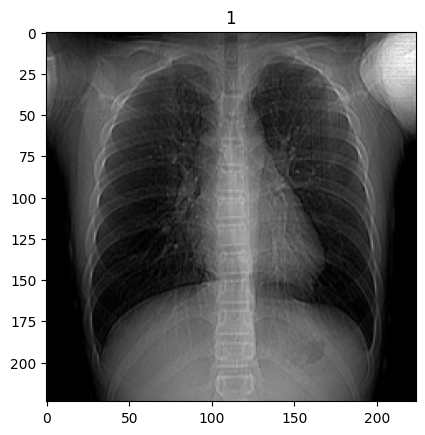

In [41]:
random_number = random.randint(1, len(x_train))
plt.imshow(x_train[random_number])
plt.title(y_train[random_number])
plt.show

In [42]:
# Define the data augmentation pipeline
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [43]:
# Build the model
base_model = ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='avg'
)
base_model.trainable = False

In [44]:
model = Sequential([
    data_augmentation,
    base_model,
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [45]:
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# model.summary()

In [46]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=5
)
train = model.fit(
    x=x_train,
    y=y_train,
    batch_size=10,
    validation_split=0.2,
    epochs=15,
    callbacks=[callback],
    verbose=1
)

Epoch 1/15
13/13 [==============================] - 47s 3s/step - loss: 0.7040 - accuracy: 0.5625 - val_loss: 0.6251 - val_accuracy: 0.5625
Epoch 2/15
13/13 [==============================] - 38s 3s/step - loss: 0.6519 - accuracy: 0.6328 - val_loss: 0.6181 - val_accuracy: 0.4688
Epoch 3/15
13/13 [==============================] - 38s 3s/step - loss: 0.6001 - accuracy: 0.6719 - val_loss: 0.5380 - val_accuracy: 0.8438
Epoch 4/15
13/13 [==============================] - 38s 3s/step - loss: 0.5629 - accuracy: 0.8047 - val_loss: 0.4957 - val_accuracy: 0.8438
Epoch 5/15
13/13 [==============================] - 34s 3s/step - loss: 0.5653 - accuracy: 0.7031 - val_loss: 0.4602 - val_accuracy: 0.9062
Epoch 6/15
13/13 [==============================] - 40s 3s/step - loss: 0.4880 - accuracy: 0.8516 - val_loss: 0.4701 - val_accuracy: 0.7812
Epoch 7/15
13/13 [==============================] - 37s 3s/step - loss: 0.4840 - accuracy: 0.8516 - val_loss: 0.4050 - val_accuracy: 0.8750
Epoch 8/15
13/13 [==

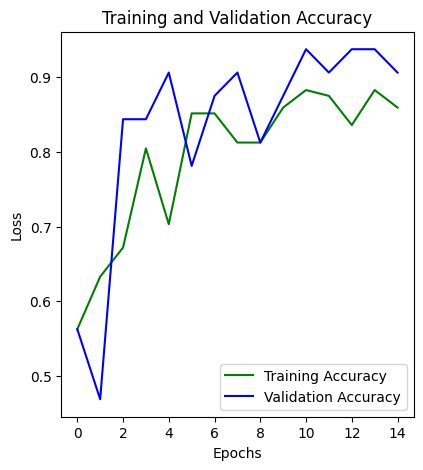

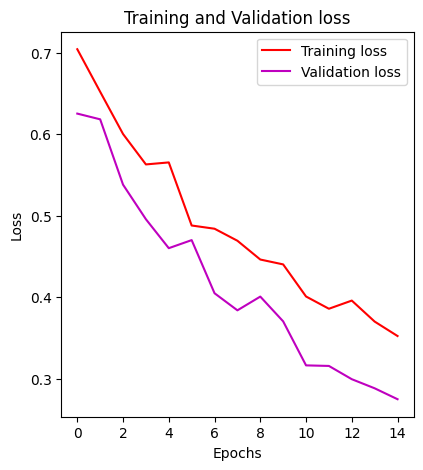

In [47]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']

loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'm', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 9s 2s/step - loss: 0.2064 - accuracy: 0.9750
Test Loss: 0.20639343559741974
Test Accuracy: 0.9750000238418579


In [49]:
# Make predictions and display results
pred = model.predict(x_test) > 0.5
print("Predictions:", pred)


2/2 [==============================] - 10s 2s/step
Predictions: [[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



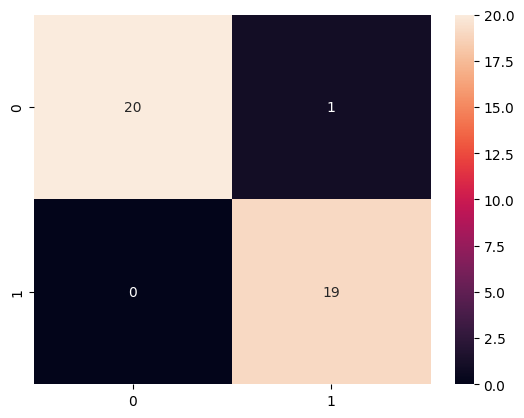

In [50]:
# Generate confusion matrix and classification report
confusion_mat = confusion_matrix(y_test, pred)
sns.heatmap(confusion_mat, annot=True)
print("Classification Report:")
print(classification_report(y_test, pred))

In [ ]:
# Save the model
model.save("model.covid")


In [50]:
from tensorflow.keras.models import load_model

# Load the saved model
# model = load_model("model.covid")
